In [6]:
#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv
from Data_scraping import *
#Twitter API credentials
consumer_key = "vMfN2GsCVGi3MhBIctOxWP0rN"
consumer_secret = "s7tEnFB0Yrw73SIu67AXl2wWeF1EaZUywyzR9C5xkaYzC0PYGl"
access_key = "1070536043844136960-MSR60ihePyNmW11Bc7VXf6NXnE1M7z"
access_secret = "43X7hT5EmJy6fbcdHYK4JBLHWLgtgmvPfx5x4iPWe7DE1"


def get_all_tweets(screen_name,consumer_key,consumer_secret,access_key,access_secret):
    '''This function gets all the tweets for the given screen name
    input:
    screen_name--> twitter user name
    consumer_key--> provide your consumer_key generated from dev.twitter.com
    consumer_secret--> provide your consumer_secret generated from dev.twitter.com
    access_key--> provide your access_key generated from dev.twitter.com
    access_secret--> provide your access_secret generated from dev.twitter.com
    '''
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize a list to hold all the tweepy Tweets
    alltweets = []  

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv 
    #outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    #write the csv  
    #with open('%s_tweets.csv' % screen_name, 'w') as f:
    #    writer = csv.writer(f)
    #    writer.writerow(["id","created_at","text"])
    #    writer.writerows(outtweets)
    with open('%s_tweets.txt' % screen_name, 'w') as f:
        for i in outtweets:
            f.write(i[-1]+'\n')
    return outtweets

def get_tweets_for_all(names):
    '''This function downloads twitter files for all the names listed
    input:
    names--> list of names
    '''
    assert isinstance(names,list) & all(isinstance(i,str) for i in names),"input names not as expected"
    for i in names:
        get_all_tweets(i)
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)
#api = tweepy.API(auth)
#api.verify_credentials()

getting tweets before 1063111517149769728
...400 tweets downloaded so far
getting tweets before 1052972271147606015
...600 tweets downloaded so far
getting tweets before 1036279708055416831
...800 tweets downloaded so far
getting tweets before 1022143673507696639
...1000 tweets downloaded so far
getting tweets before 1017093882612502527
...1200 tweets downloaded so far
getting tweets before 1007439131318898687
...1400 tweets downloaded so far
getting tweets before 997645890427981823
...1600 tweets downloaded so far
getting tweets before 981242689713733637
...1795 tweets downloaded so far
getting tweets before 980567410821550080
...1991 tweets downloaded so far
getting tweets before 980529923046731776
...2184 tweets downloaded so far
getting tweets before 980489891107803135
...2378 tweets downloaded so far
getting tweets before 980457749833310207
...2573 tweets downloaded so far
getting tweets before 980232815475294209
...2771 tweets downloaded so far
getting tweets before 9787900886320

In [18]:
def cleaned_up_text(fname,name):
    '''This function prunes the dataset to access important words
    input:
    fname--> file name
    output:
    cleaned up text data as string
    '''
    assert isinstance(fname,str),"file name is not a string"
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    shortword = re.compile(r'\W*\b\w{1,5}\b')
    with open(fname,'r') as content_file:
        content = content_file.read()
        text=re.sub(r'http\S+', '', content)
        text=re.sub(r'%s'%name,'', text)
        text=shortword.sub('',text)
        text=emoji_pattern.sub('',text)
    return text
import numpy as np
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray       

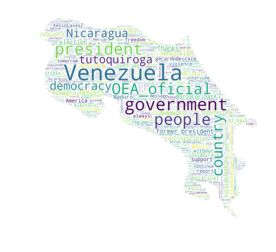

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from skimage.transform import resize
import warnings
from imageio import imread as imr
import re
warnings.filterwarnings("ignore")
mask2=imr('costa_rica.jpg')
mask2=rgb2gray(mask2)
mask2[mask2>250]=255
mask2[mask2<250]=0
mask2=resize(mask2,(1200,1200))
data1=cleaned_up_text('translated_Laura_ch_tweets.txt','Laura_Ch')
data2=cleaned_up_text('translated_CarlosAlvQ_tweets.txt','CarlosAlvQ')
data3=cleaned_up_text('translated_luisguillermosr_tweets.txt','luisguillermosr')

# Create and generate a word cloud image:
#print(text)
wordcloud = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data1)

#print(wordcloud)
# Display the generated image:
wordcloud.to_file("first_review.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#print(wordcloud.words_.values())

In [22]:
def file_info(fname):
    with open(fname) as infile:
        lines=0
        words=0
        characters=0
        for line in infile:
            wordslist=line.split()
            lines=lines+1
            words=words+len(wordslist)
            characters += sum(len(word) for word in wordslist)
    return lines,words,characters


In [23]:
wordcloud1 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data1)
wordcloud1.to_file("first_review1.png")
wordcloud2 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data2)
wordcloud2.to_file("first_review2.png")
wordcloud3 = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data3)
wordcloud3.to_file("first_review3.png")

In [4]:
from google.cloud import translate
import os
import time
# Instantiates a client

def translate_file(fname):
    translate_client = translate.Client()
    avg=os.path.getsize(fname)
    n=avg//19000
    print(n)
    with open(fname,'r') as file,open('translated_%s' %fname,'w') as fileT:
        for i in range(n):
            print(i)
            text=file.read(19000)
            text=translate_client.translate(text,target_language='en')
            fileT.write(text['translatedText'])
translate_file("Laura_ch_tweets.txt")

22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [5]:
translate_file('luisguillermosr_tweets.txt')

22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [7]:
translate_file('CarlosAlvQ_tweets.txt')

22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
